#Linear regression on loan data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# read data into Pandas dataframe and remove incomplete rows
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData.dropna(inplace=True)

#take a look at the head to see where cleaning is required
print(loansData.head())

       Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
81174             20000                       20000         8.90%   36 months   
99592             19200                       19200        12.12%   36 months   
80059             35000                       35000        21.98%   60 months   
15825             10000                        9975         9.99%   36 months   
33182             12000                       12000        11.71%   36 months   

             Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
81174  debt_consolidation               14.90%    SC       MORTGAGE   
99592  debt_consolidation               28.36%    TX       MORTGAGE   
80059  debt_consolidation               23.81%    CA       MORTGAGE   
15825  debt_consolidation               14.30%    KS       MORTGAGE   
33182         credit_card               18.78%    NJ           RENT   

       Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
81174

In [9]:
# Convert non-numeric columns as follows
#remove % symbol from interest rate and convert to float
loansData['Interest.Rate'] = [float(interest[0:-1])/100 for interest in loansData['Interest.Rate']] 

#remove "month" at the end of loan length convert to integer
loansData['Loan.Length'] = [int(length[0:-7]) for length in loansData['Loan.Length']] 

#create a new column called Fico Score. Use only the lower limit value of Fico Range
loansData['FICO.Score'] = [int(val.split('-')[0]) for val in loansData['FICO.Range']]
  

In [10]:
loansData['Interest.Rate'][0:5]

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64

In [12]:
loansData['Loan.Length'][0:5] # first 5 rows of Loan.Length

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: int64

In [63]:
loansData['FICO.Score'][0:5] # first 5 rows of FICO.score

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64

In [13]:
print(loansData.head())

       Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
81174             20000                       20000         0.0890   
99592             19200                       19200         0.1212   
80059             35000                       35000         0.2198   
15825             10000                        9975         0.0999   
33182             12000                       12000         0.1171   

       Loan.Length        Loan.Purpose Debt.To.Income.Ratio State  \
81174           36  debt_consolidation               14.90%    SC   
99592           36  debt_consolidation               28.36%    TX   
80059           60  debt_consolidation               23.81%    CA   
15825           36  debt_consolidation               14.30%    KS   
33182           36         credit_card               18.78%    NJ   

      Home.Ownership  Monthly.Income FICO.Range  Open.CREDIT.Lines  \
81174       MORTGAGE         6541.67    735-739                 14   
99592       MORTGAGE    

In [14]:
%matplotlib inline

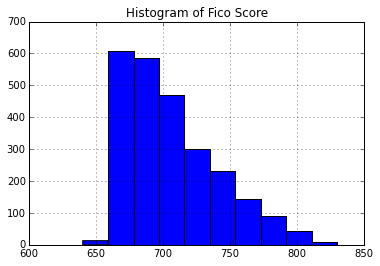

In [12]:
plt.figure()
p = loansData['FICO.Score'].hist()
plt.title("Histogram of Fico Score")
plt.show()

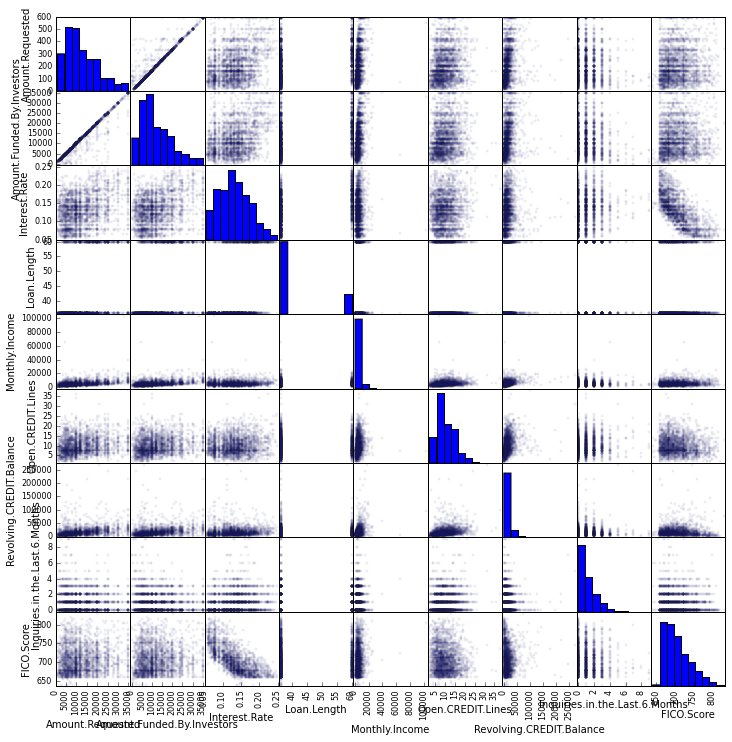

In [15]:
#create a scatter plot matrix and check for any noticeable trend
a = pd.scatter_matrix(loansData, alpha=0.05, figsize=(12,12), diagonal='hist')

In [32]:
#There is an approximate linear trend between FICO Score and Interest Rate 
#No apparent trend between Monthly Income and Interest Rate. 
#No obvious variation in the Monthly Income plot for Loan Length 
#There is also a distinct and increasing trend in the Monthly Income plot for Loan Amount.


#This suggests FICO Score and Loan Amount should be used in our model as independent variables 


In [25]:
#Extract data for variables
intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

In [30]:
#column from a DataFrame is returned as a Series datatype.reshape the data like this
# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [100]:
#stack columns of independent variables
#put the two columns together to create an input matrix (with one column for each independent variable)
x = np.column_stack([x1,x2])

#create linear model
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Tue, 26 May 2015   Prob (F-statistic):               0.00
Time:                        16:14:40   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""